In [ ]:
# ECGR 4105 Assignment 1
# Anthony Almonte
# #800916043
# 6/23/25

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd     # import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ECGR 4105 csv/HW1.csv' # Google Drive file path
df = pd.DataFrame(pd.read_csv(file_path))
df.head() # obtains first 'n' rows from dataset, n=5
M=len(df)
M

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100

In [ ]:
df.describe()

,X1,X2,X3,Y
count,100.000000,100.000000,100.000000,100.000000
mean,2.000000,2.000000,1.960000,1.851276
std,1.172181,1.172154,1.163005,2.774643
min,0.000000,0.070303,0.027879,-5.332455
25%,1.000000,0.979394,0.952121,0.527533
50%,2.000000,2.009697,1.949091,2.879003
75%,3.000000,3.040000,2.946061,3.925389
max,4.000000,3.949091,3.943030,5.545892


In [ ]:
x1 = df.values[:, 0]  # values from column #1 X1
x2 = df.values[:, 1]  #             column #2 X2
x3 = df.values[:, 2]  #             column #3 X3
y = df.values[:, 3]   #             column #4 Y

m = len(y)  # # training examples
n1 = len(x1)
n2 = len(x2)
n3 = len(x3)

print('X1 = ', x1[: 5]) # prints first 5 values
print('X2 = ', x2[: 5])
print('X3 = ', x3[: 5])
print('y  = ', y[:5])

print('m  = ', m)        # total # training examples
print('n1 = ', n1)
print('n2 = ', n2)
print('n3 = ', n3)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y  =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m  =  100
n1 =  100
n2 =  100
n3 =  100


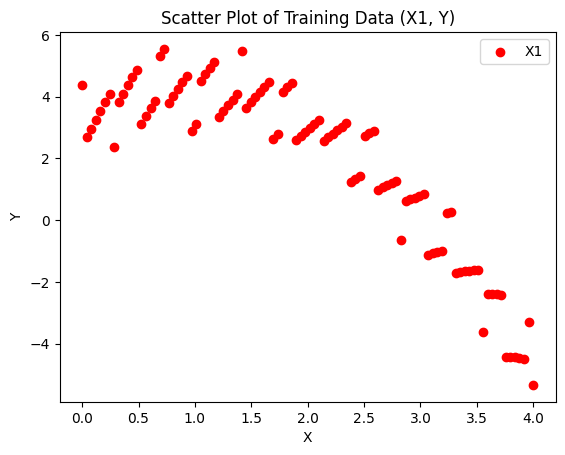

In [ ]:
plt.scatter(x1, y, color='red', marker='o', label = 'X1') # Training Data Plot X1

plt.rcParams["figure.figsize"] = (10, 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data (X1, Y)')
plt.legend()
plt.show()

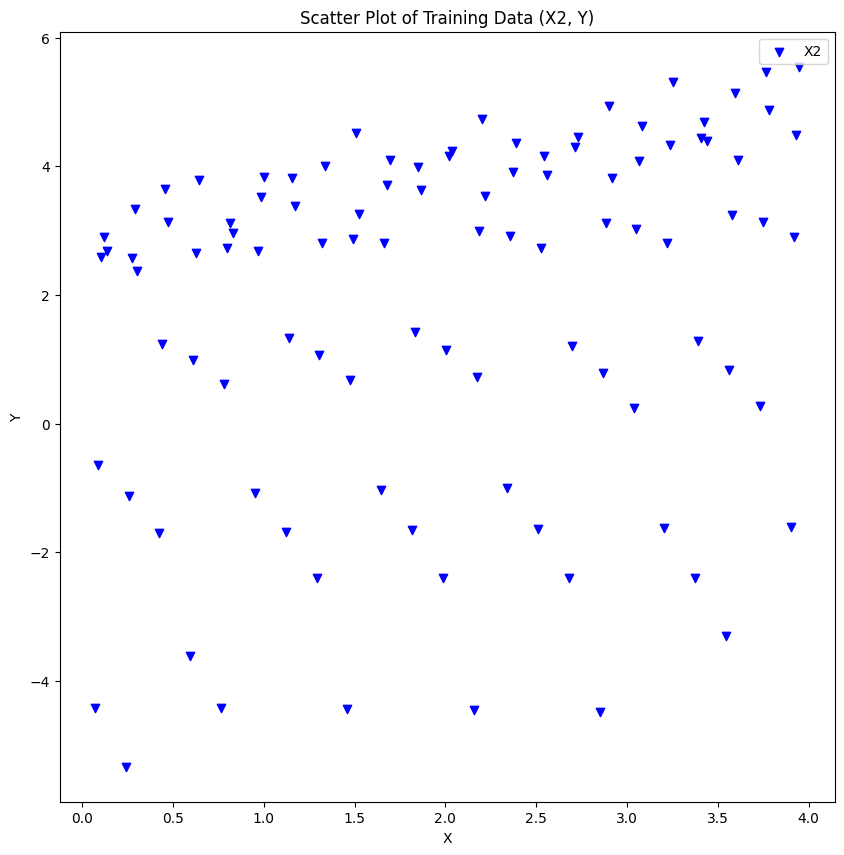

In [ ]:
plt.scatter(x2, y, color='blue', marker='v', label = 'X2') # Training Data Plot X2

plt.rcParams["figure.figsize"] = (10, 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data (X2, Y)')
plt.legend()
plt.show()

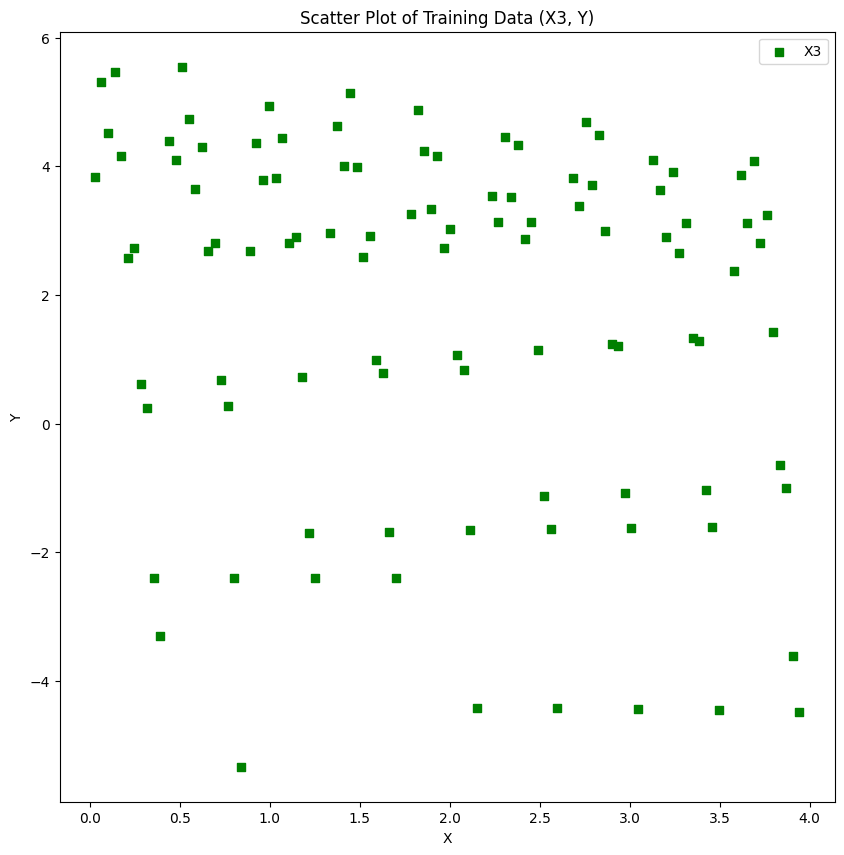

In [ ]:
plt.scatter(x3, y, color='green', marker='s', label = 'X3') # Training Data Plot X3

plt.rcParams["figure.figsize"] = (10, 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data (X3, Y)')
plt.legend()
plt.show()

In [ ]:
X_0 = np.ones((m, 1)) # column vector of ones
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
X_1 = x1.reshape(m, 1) # reshaping features 'x'

X_2 = x2.reshape(m, 1)

X_3 = x3.reshape(m, 1)
X_3[:10]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364]])

In [ ]:
S1 = np.hstack((X_0, X_1)) # horizontal stacking
S2 = np.hstack((X_0, X_2))
S3 = np.hstack((X_0, X_3))

S3[:10]

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939],
       [1.        , 2.68242424],
       [1.        , 3.13090909],
       [1.        , 3.57939394],
       [1.        , 0.02787879],
       [1.        , 0.47636364]])

In [ ]:
theta = np.zeros(2)
theta

array([0., 0.])

# **PROBLEM 1**

In [ ]:
# Functions provided by Vinit Katariya
def compute_cost(X, y, theta):

 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

def gradient_descent(X, y, theta, alpha, iterations):

    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [ ]:
theta = [0., 0.] # parameters
iterations = 100;
alpha = 0.3;

theta1, cost_history1 = gradient_descent(S1, y, theta, alpha, iterations)
theta2, cost_history2 = gradient_descent(S2, y, theta, alpha, iterations)
theta3, cost_history3 = gradient_descent(S3, y, theta, alpha, iterations)

print('Final value of theta (X1) =', theta1) # Final theta
print('Final value of theta (X2) =', theta2)
print('Final value of theta (X3) =', theta3)

#print('cost_history (X1) =', cost_history1) # can be used to get min. value of cost function
#print('cost_history (X2) =', cost_history2)
#print('cost_history (X3) =', cost_history3)

Final value of theta (X1) = [ 5.92194134 -2.03599846]
Final value of theta (X2) = [0.73559638 0.5577882 ]
Final value of theta (X3) = [ 2.86895439 -0.51950692]


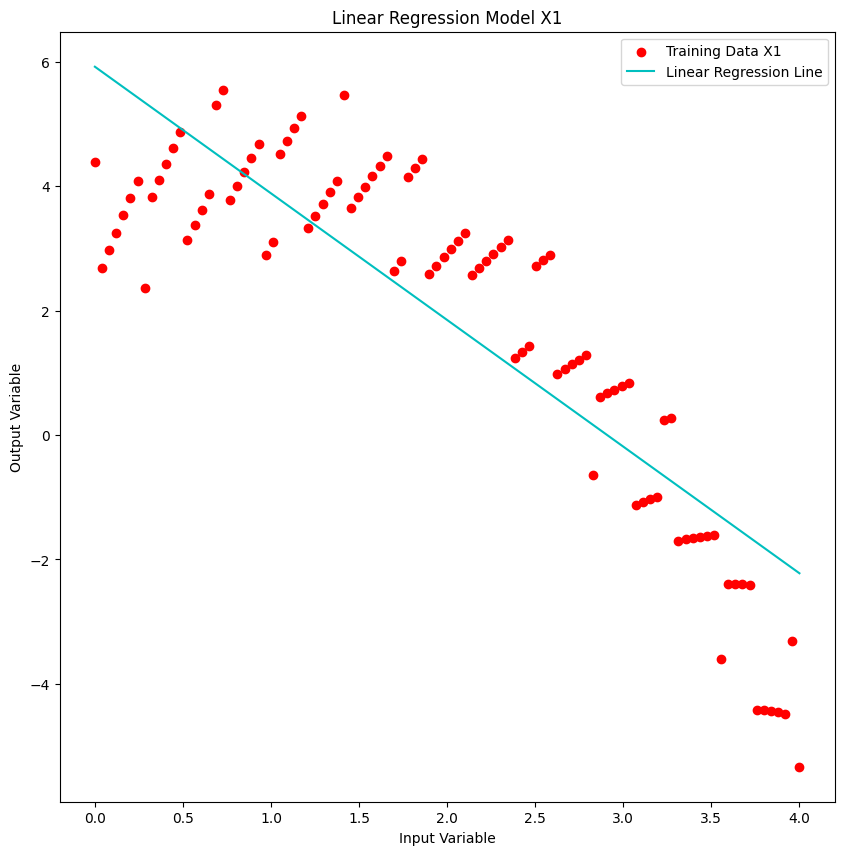

In [ ]:
plt.scatter(S1[:,1], y, color='r', marker= 'o', label= 'Training Data X1') # Linear Regression Plot X1
plt.plot(S1[:,1],S1.dot(theta1), color='c', label='Linear Regression Line')
plt.rcParams["figure.figsize"] = (10,10)

plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.title('Linear Regression Model X1')
plt.legend()

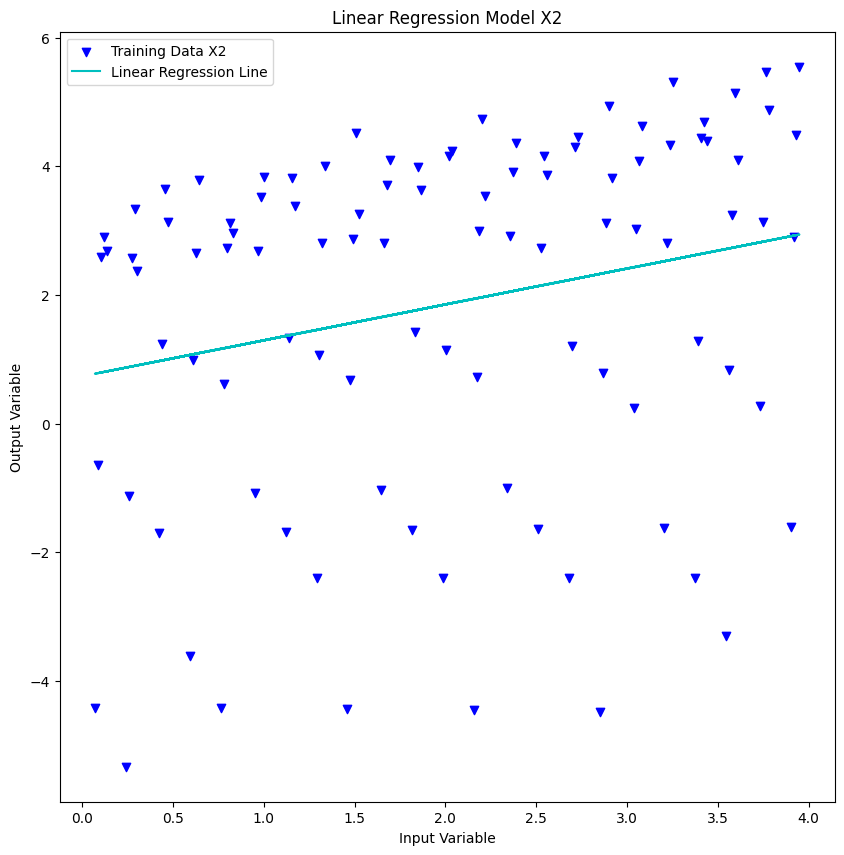

In [ ]:
plt.scatter(S2[:,1], y, color='b', marker= 'v', label= 'Training Data X2') # Linear Regression Plot X2
plt.plot(S2[:,1],S2.dot(theta2), color='c', label='Linear Regression Line')
plt.rcParams["figure.figsize"] = (10,10)

plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.title('Linear Regression Model X2')
plt.legend()

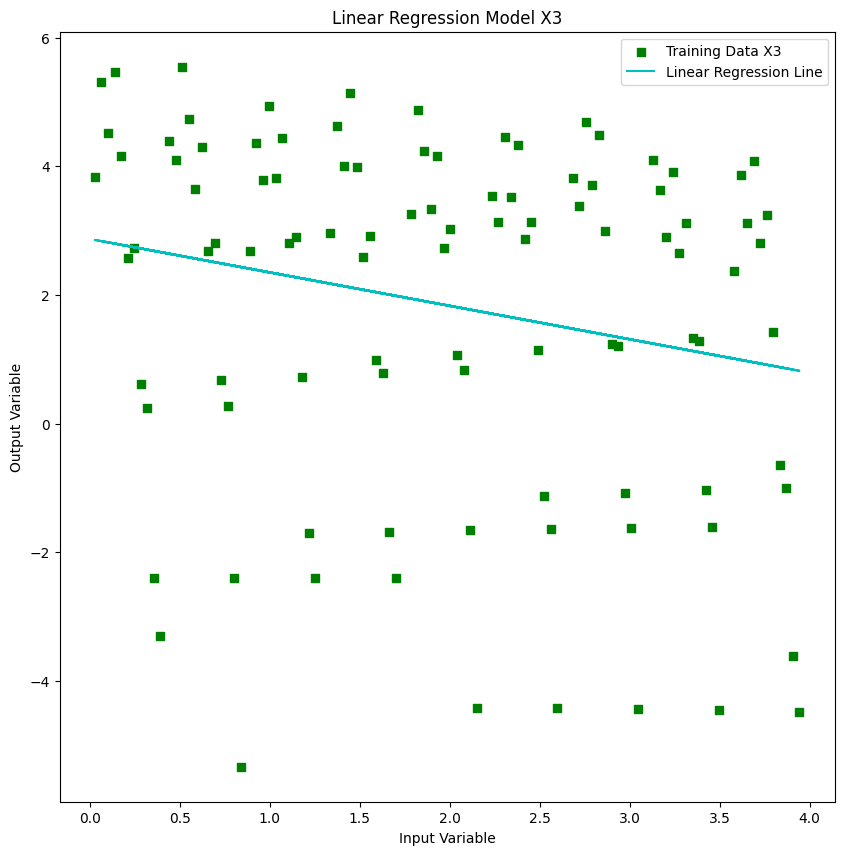

In [ ]:
plt.scatter(S3[:,1], y, color='g', marker= 's', label= 'Training Data X3') # Linear Regression Plot X3
plt.plot(S3[:,1],S3.dot(theta3), color='c', label='Linear Regression Line')
plt.rcParams["figure.figsize"] = (10,10)

plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.title('Linear Regression Model X3')
plt.legend()

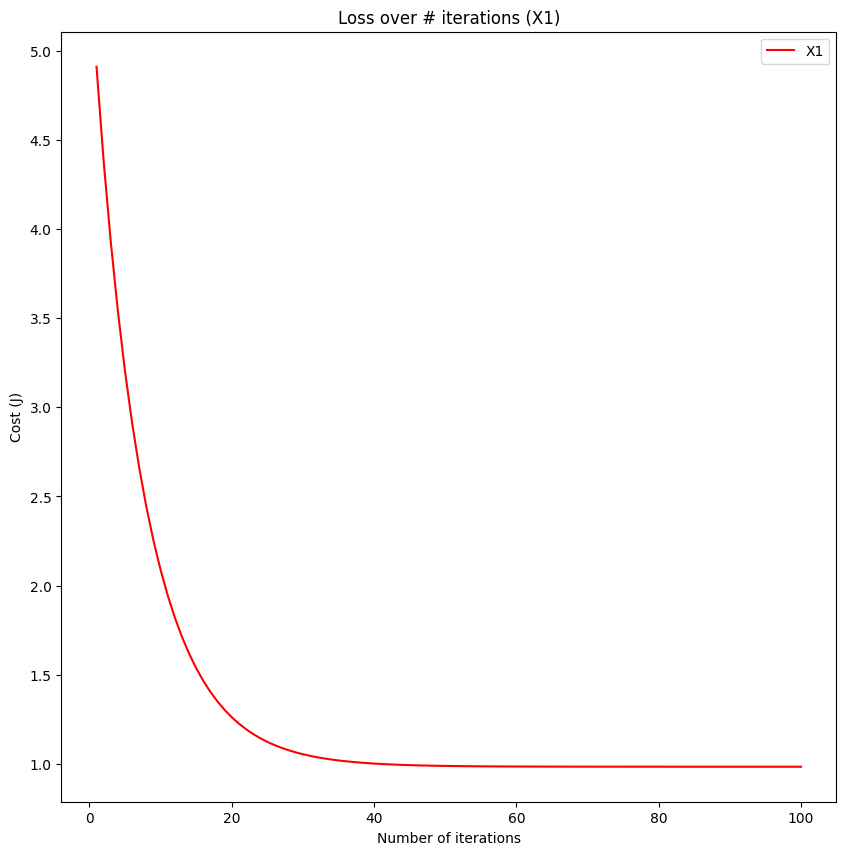

In [ ]:
plt.plot(range(1, iterations + 1),cost_history1, color='red', label = 'X1') # Gradient Descent X1

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (X1)')
plt.legend()

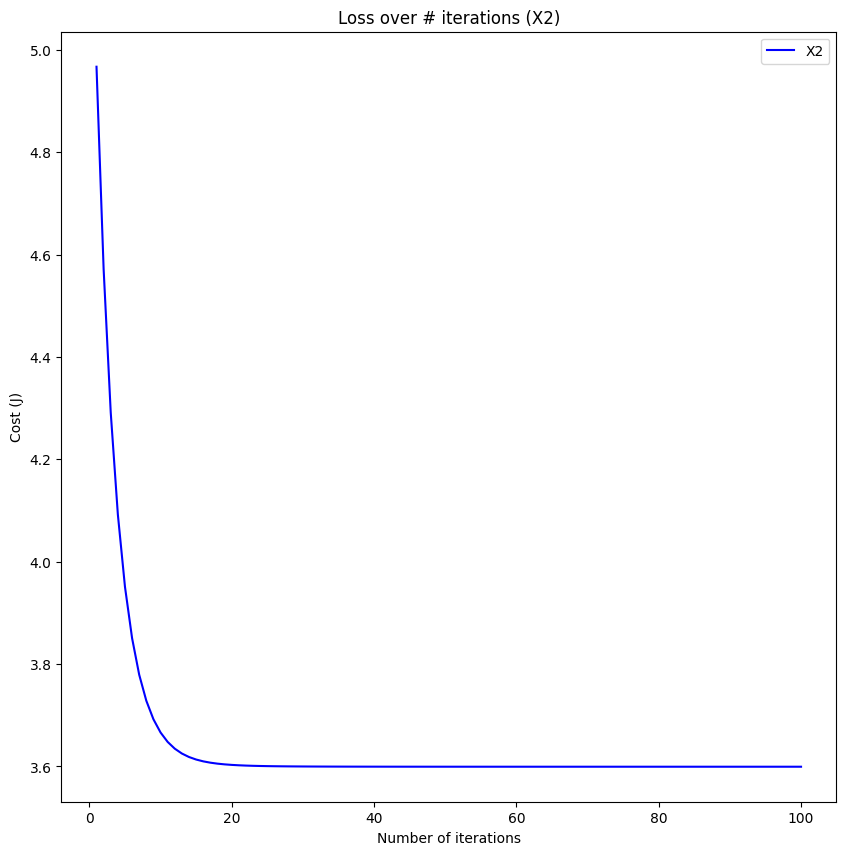

In [ ]:
plt.plot(range(1, iterations + 1),cost_history2, color='blue', label = 'X2') # Gradient Descent X2

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (X2)')
plt.legend()

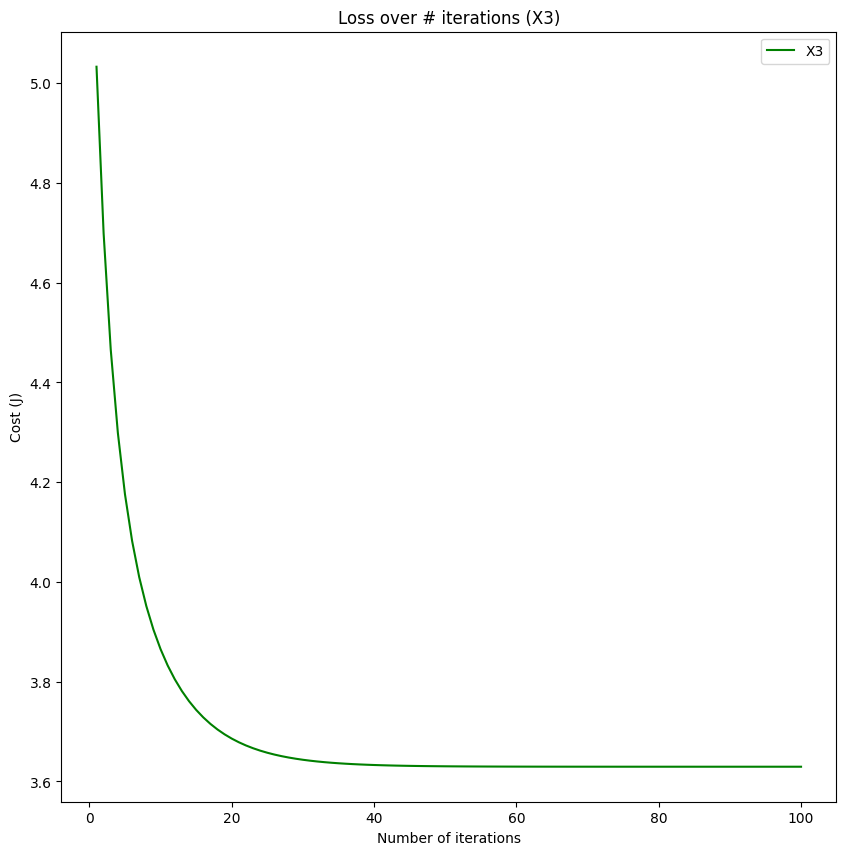

In [ ]:
plt.plot(range(1, iterations + 1),cost_history3, color='green', label = 'X3') # Gradient Descent X3

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (X3)')
plt.legend()

In [ ]:
tAlpha1 = 0.03 # testing various values for parameter 'alpha'
tAlpha2 = 0.2
tAlpha3 = 0.0001

tTheta1_1, cost_historyT11 = gradient_descent(S1, y, theta, tAlpha1, iterations)
tTheta1_2, cost_historyT12 = gradient_descent(S1, y, theta, tAlpha2, iterations)
tTheta1_3, cost_historyT13 = gradient_descent(S1, y, theta, tAlpha3, iterations)

tTheta2_1, cost_historyT21 = gradient_descent(S2, y, theta, tAlpha1, iterations)
tTheta2_2, cost_historyT22 = gradient_descent(S2, y, theta, tAlpha2, iterations)
tTheta2_3, cost_historyT23 = gradient_descent(S2, y, theta, tAlpha3, iterations)

tTheta3_1, cost_historyT31 = gradient_descent(S3, y, theta, tAlpha1, iterations)
tTheta3_2, cost_historyT32 = gradient_descent(S3, y, theta, tAlpha2, iterations)
tTheta3_3, cost_historyT33 = gradient_descent(S3, y, theta, tAlpha3, iterations)

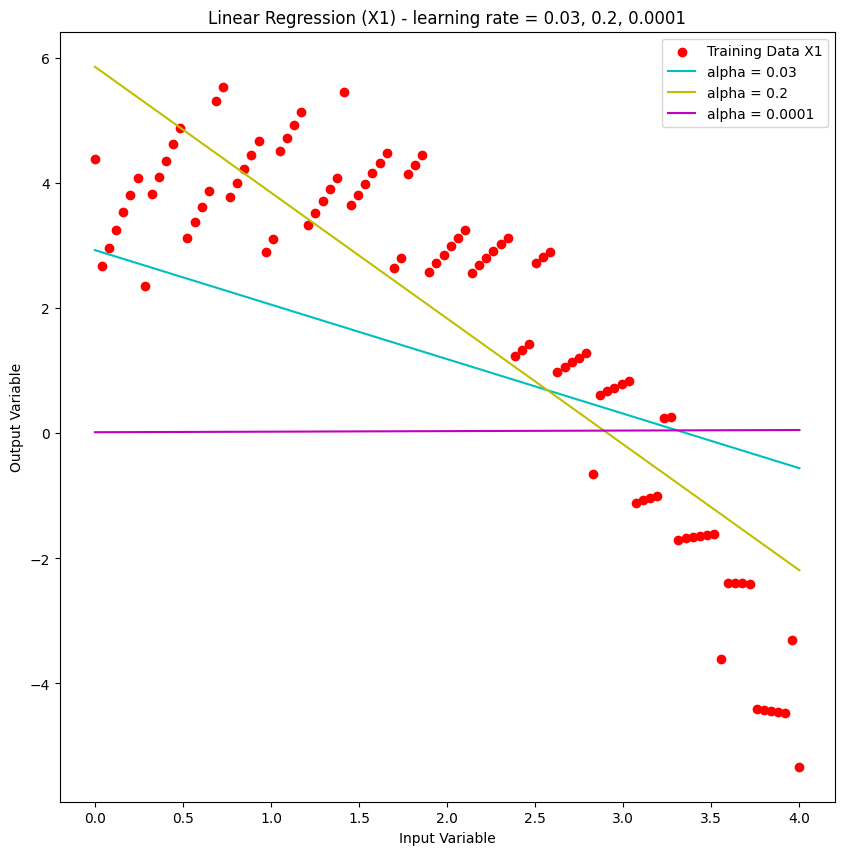

In [ ]:
plt.scatter(S1[:,1], y, color='r', marker= 'o', label= 'Training Data X1')      # Linear Regression using various
plt.plot(S1[:,1],S1.dot(tTheta1_1), color='c', label='alpha = 0.03')            # values for learning rate 'alpha' (X1)

plt.plot(S1[:,1],S1.dot(tTheta1_2), color='y', label='alpha = 0.2')

plt.plot(S1[:,1],S1.dot(tTheta1_3), color='m', label='alpha = 0.0001')

plt.rcParams["figure.figsize"] = (10,10)

plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.title('Linear Regression (X1) - learning rate = 0.03, 0.2, 0.0001')
plt.legend()

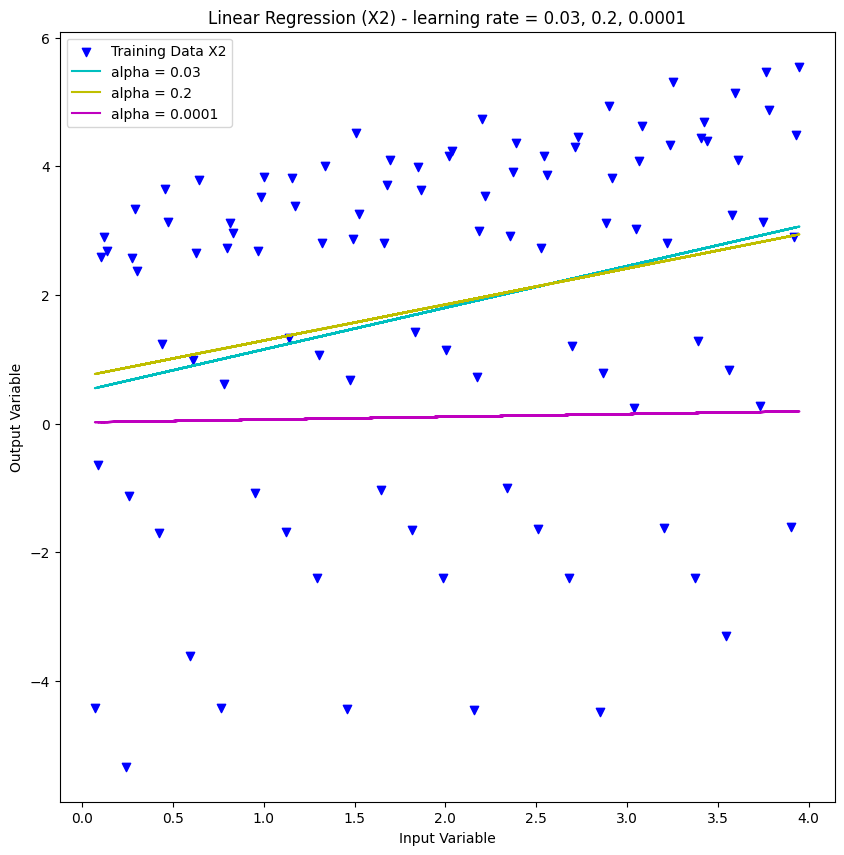

In [ ]:
plt.scatter(S2[:,1], y, color='b', marker= 'v', label= 'Training Data X2')      # Linear Regression using various
plt.plot(S2[:,1],S2.dot(tTheta2_1), color='c', label='alpha = 0.03')            # values for learning rate 'alpha' (X2)

plt.plot(S2[:,1],S2.dot(tTheta2_2), color='y', label='alpha = 0.2')

plt.plot(S2[:,1],S2.dot(tTheta2_3), color='m', label='alpha = 0.0001')

plt.rcParams["figure.figsize"] = (10,10)

plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.title('Linear Regression (X2) - learning rate = 0.03, 0.2, 0.0001')
plt.legend()

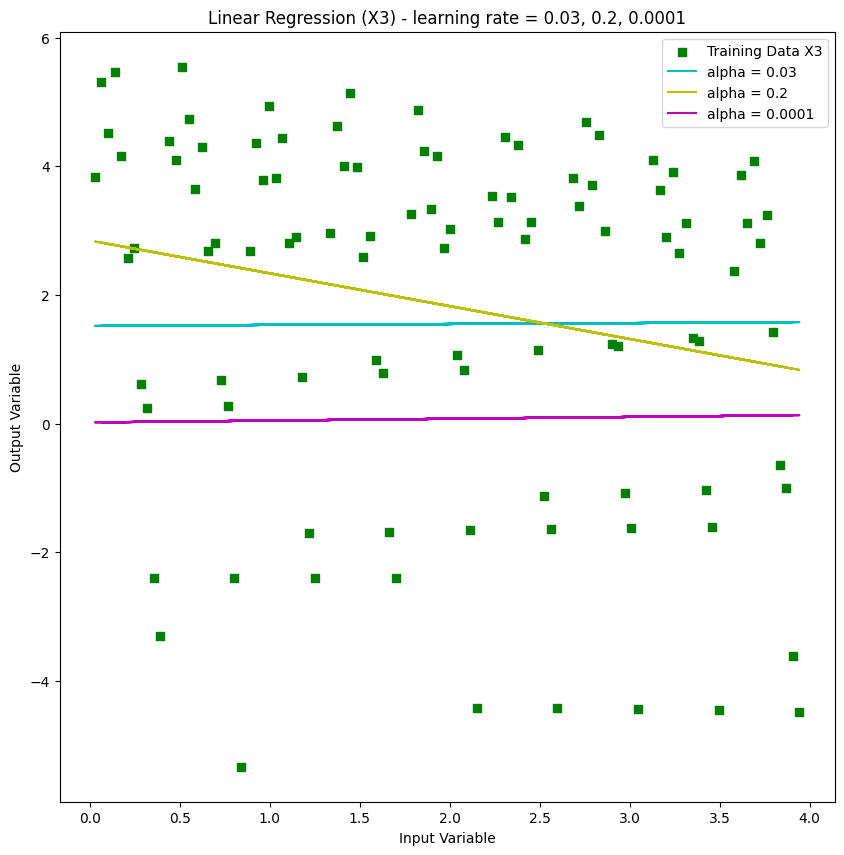

In [ ]:
plt.scatter(S3[:,1], y, color='g', marker= 's', label= 'Training Data X3')      # Linear Regression using various
plt.plot(S3[:,1],S3.dot(tTheta3_1), color='c', label='alpha = 0.03')            # values for learning rate 'alpha' (X3)

plt.plot(S3[:,1],S3.dot(tTheta3_2), color='y', label='alpha = 0.2')

plt.plot(S3[:,1],S3.dot(tTheta3_3), color='m', label='alpha = 0.0001')

plt.rcParams["figure.figsize"] = (10,10)

plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.title('Linear Regression (X3) - learning rate = 0.03, 0.2, 0.0001')
plt.legend()

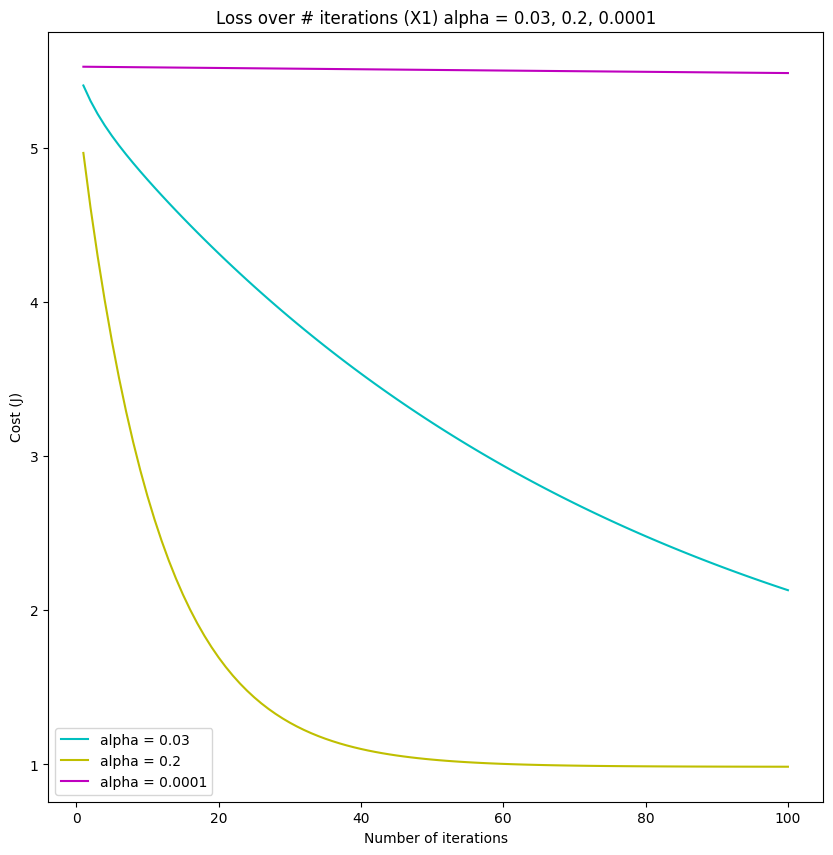

In [ ]:
plt.plot(range(1, iterations + 1),cost_historyT11, color='c', label = 'alpha = 0.03')   # Gradient Descent X1
plt.plot(range(1, iterations + 1),cost_historyT12, color='y', label = 'alpha = 0.2')    # using various learning rates
plt.plot(range(1, iterations + 1),cost_historyT13, color='m', label = 'alpha = 0.0001')

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (X1) alpha = 0.03, 0.2, 0.0001')
plt.legend()

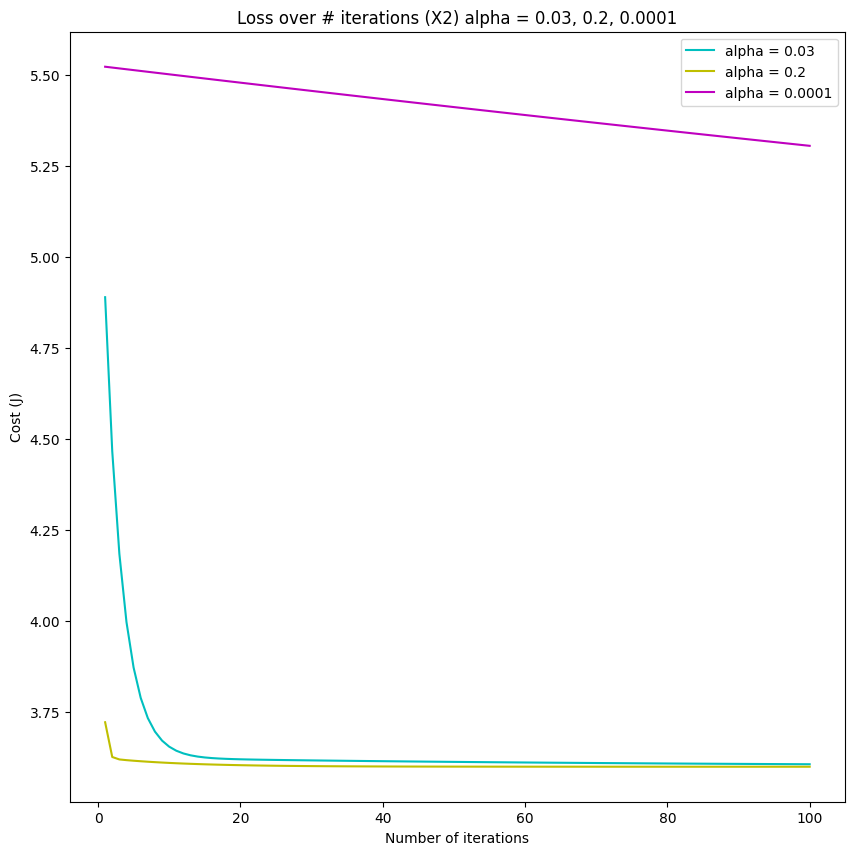

In [ ]:
plt.plot(range(1, iterations + 1),cost_historyT21, color='c', label = 'alpha = 0.03')    # Gradient Descent X2
plt.plot(range(1, iterations + 1),cost_historyT22, color='y', label = 'alpha = 0.2')     # using various learning rates
plt.plot(range(1, iterations + 1),cost_historyT23, color='m', label = 'alpha = 0.0001')

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (X2) alpha = 0.03, 0.2, 0.0001')
plt.legend()

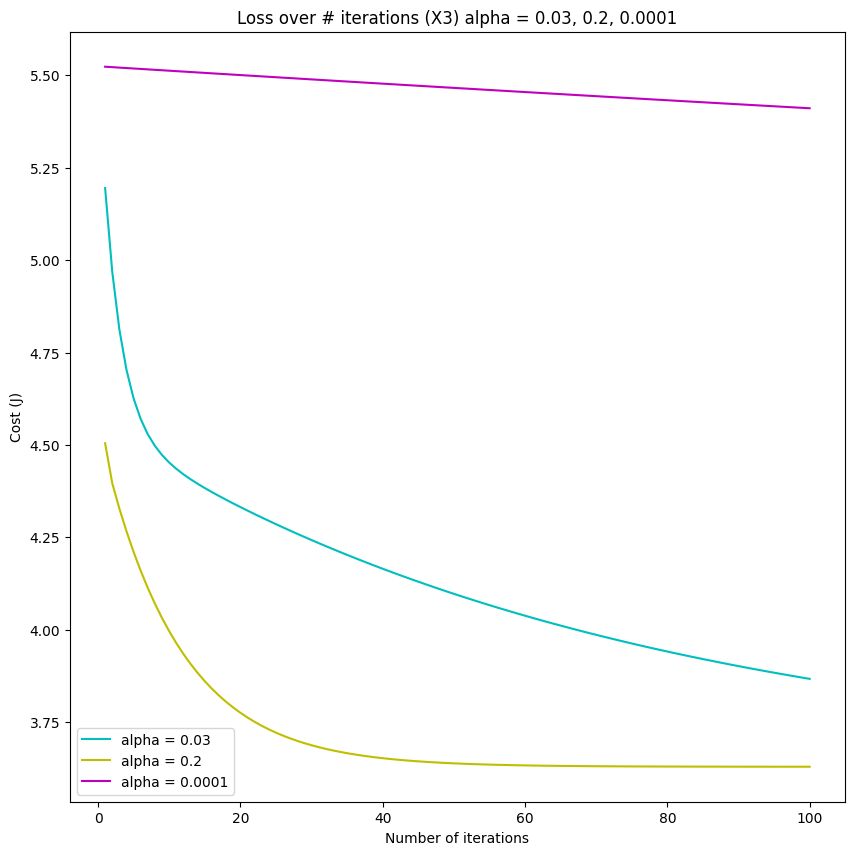

In [ ]:
plt.plot(range(1, iterations + 1),cost_historyT31, color='c', label = 'alpha = 0.03')    # Gradient Descent X3
plt.plot(range(1, iterations + 1),cost_historyT32, color='y', label = 'alpha = 0.2')     # using various learning rates
plt.plot(range(1, iterations + 1),cost_historyT33, color='m', label = 'alpha = 0.0001')

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (X3) alpha = 0.03, 0.2, 0.0001')
plt.legend()

# **PROBLEM 2**

In [ ]:
x_All = np.hstack((X_0, X_1, X_2, X_3)) # horizontally stacking ALL variables
thetaX = np.zeros(4)                    # creating 1*4 array for proper dimensions
iterate_X = 1000       # parameters for
alpha_X = 0.1          # all variables
#x_All[:20]

In [ ]:
thetaX, cost_historyX = gradient_descent(x_All, y, thetaX, alpha_X, iterate_X) # 0.2, 0.02, 0.05, 0.15
print('Final Theta =', thetaX)
print('Cost =', cost_historyX[-1])

Final Theta = [ 5.31393577 -2.00368658  0.53260157 -0.26556795]
Cost = 0.7384642444206544


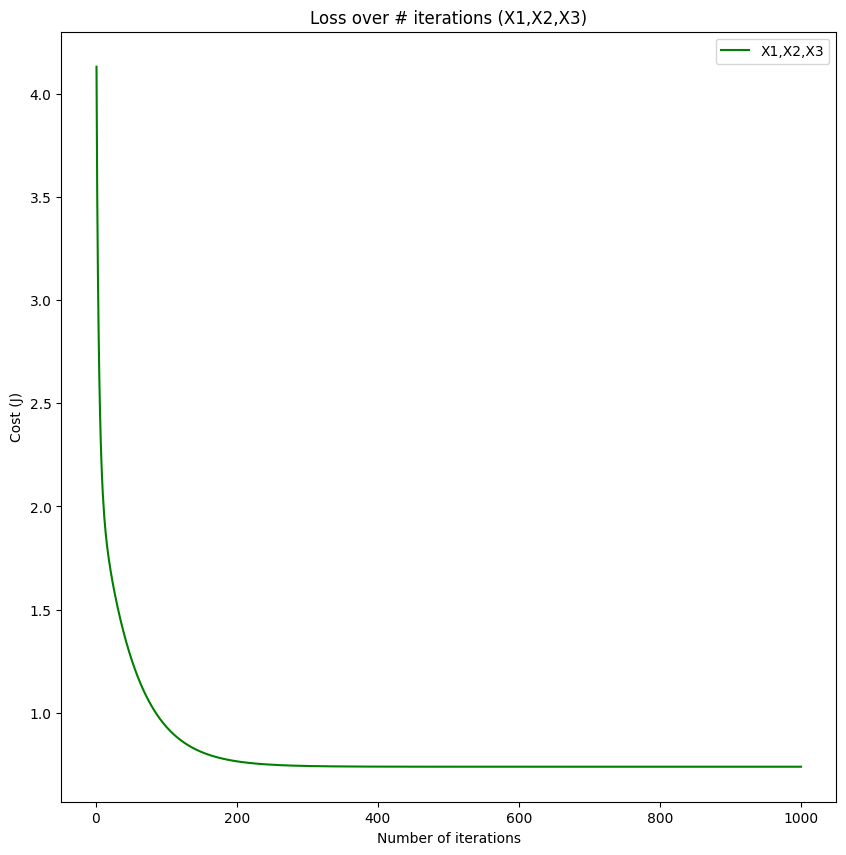

In [ ]:
plt.plot(range(1, iterate_X + 1),cost_historyX, color='green', label = 'X1,X2,X3')   # Gradient Descent All Variables

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (X1,X2,X3)')
plt.legend()

# **PREDICTIONS**

In [ ]:
predict1 = [1,1,1,1]
pre_Y1 = np.dot(predict1, thetaX) # predictions for: (1,1,1)
                                  # dot product of X and final theta
predict2 = [1,2,0,4]
pre_Y2 = np.dot(predict2, thetaX) #                  (2,0,4)

predict3 = [1,3,2,1]
pre_Y3 = np.dot(predict3, thetaX) #                  (3,2,1)

print("Predicted values of 'Y':")
print("Model prediction for (1,1,1) =", pre_Y1)
print("Model prediction for (2,0,4) =", pre_Y2)
print("Model prediction for (3,2,1) =", pre_Y3)

Predicted values of 'Y':
Model prediction for (1,1,1) = 3.5772828177319917
Model prediction for (2,0,4) = 0.24429082475948705
Model prediction for (3,2,1) = 0.10251123321230088


In [ ]:
alpha_X1 = 0.2
alpha_X2 = 0.02
alpha_X3 = 0.15

thetaX_a1, cost_X_alpha1 = gradient_descent(x_All, y, thetaX, alpha_X1, iterate_X)
thetaX_a2, cost_X_alpha2 = gradient_descent(x_All, y, thetaX, alpha_X2, iterate_X)
thetaX_a3, cost_X_alpha3 = gradient_descent(x_All, y, thetaX, alpha_X3, iterate_X)
# testing various learning rates 'alpha'

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-12-4176944416.py:6: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)


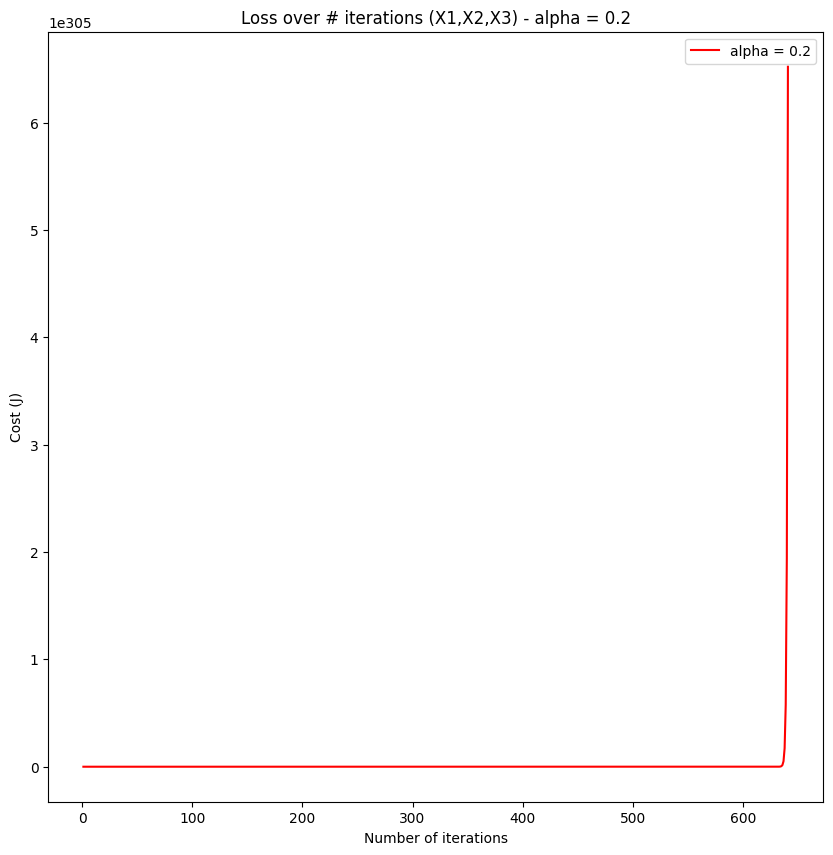

In [ ]:
plt.plot(range(1, iterate_X + 1),cost_X_alpha1, color='red', label = 'alpha = 0.2') # Gradient Descent All Variables alpha = 0.2

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (X1,X2,X3) - alpha = 0.2')
plt.legend()

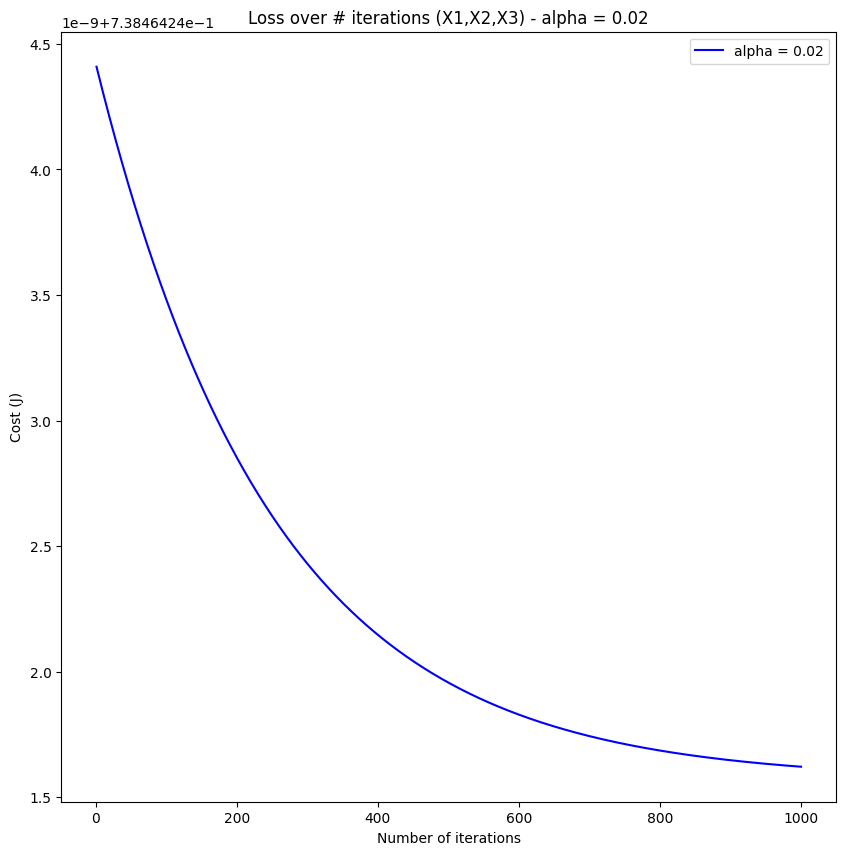

In [ ]:
plt.plot(range(1, iterate_X + 1),cost_X_alpha2, color='blue', label = 'alpha = 0.02') # Gradient Descent All Variables alpha = 0.02


plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (X1,X2,X3) - alpha = 0.02')
plt.legend()

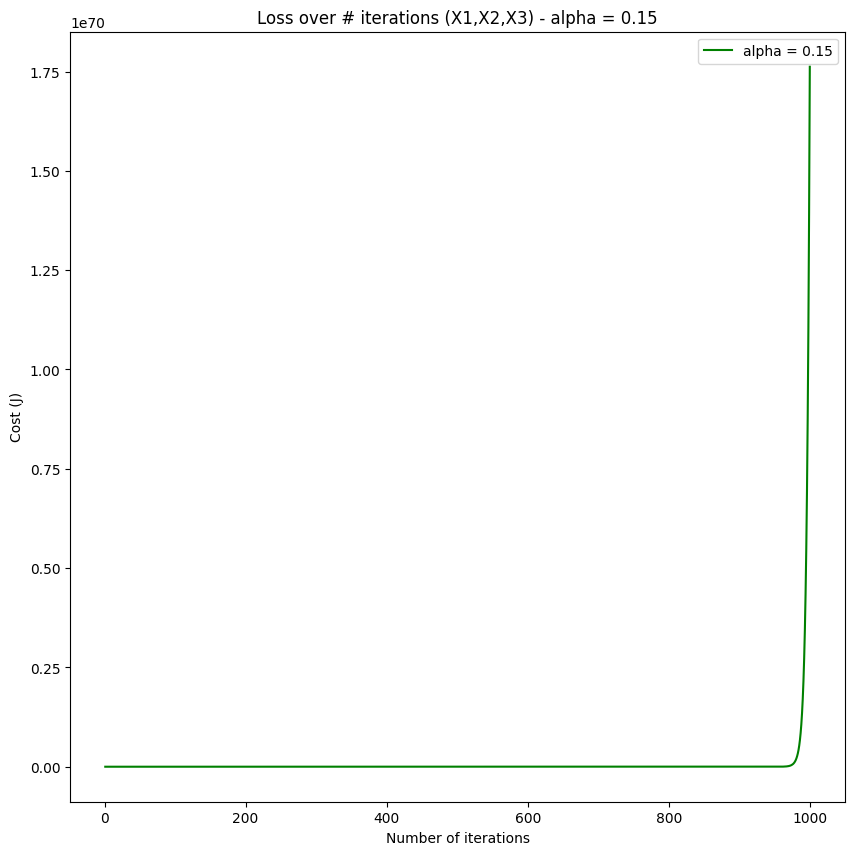

In [ ]:
plt.plot(range(1, iterate_X + 1),cost_X_alpha3, color='green', label = 'alpha = 0.15') # Gradient Descent All Variables alpha = 0.15

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (X1,X2,X3) - alpha = 0.15')
plt.legend()